In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import os

import cv2
from matplotlib import pyplot as plt
import numpy as np

from utils import load_image, toGrey, index_row_in_array, is_row_in_array, imshow_components

In [2]:
h, w = 5, 5
size = (h, w)

In [3]:
sample_image1 = np.zeros(size, dtype=np.int8)
sample_image2 = np.zeros(size, dtype=np.int8)

# sample_image1[1::2, 1:4:2] = 1
# sample_image1[2, 2] = 1
for i in range(w):
    sample_image2[i, i] = 1
    sample_image2[w-i-1, i] = 1

sample_image1 = sample_image2.copy()
# sample_image1[0::4, 0::4] = 0

In [4]:
sample_image1 = toGrey(load_image('dump/img_3.jpg'))
sample_image2 = toGrey(load_image('x.jpg'))

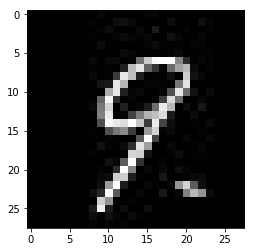

In [5]:
plt.imshow(sample_image1.astype(np.uint8), cmap='gray', vmin=0)

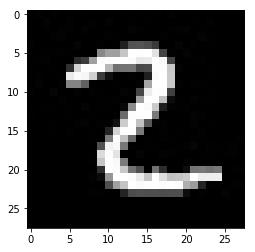

In [6]:
plt.imshow(sample_image2.astype(np.uint8), cmap='gray', vmin=0)

In [7]:
def segment(y):
    y_unique = np.unique(y)

    cls, cx = [], 0
    last_b = -1
    for i in y_unique:
        m = abs(i - y_unique).flatten()
        m = m.mean() - m.std()/2

        a = i - m;a = 0 if a < 0 else a
        b = i + m;b = 255 if b > 255 else b

        img = ((y >= a) & (y <= b)).astype(np.int8)

        display = False
        if len(cls) == 0:
            cls = np.array([img], dtype=np.int8)
            last_a, last_b = a, b
            display = True

        else:
            if a > 0.5 * (last_a + last_b) and (not is_row_in_array(img, cls)):
                cls = np.concatenate((cls, [img]))
                last_a, last_b = a, b
                display = True

        if display:
            imgx = img.copy()
            cx+=1

            fig=plt.figure(figsize=(10, 10))
            w, h, rows, columns = 10, 10, 1, 3

            ret, labels = cv2.connectedComponents(img)
    #         labeled_img = imshow_components(labels)

            li = [0, img, y]#, labeled_img]

            print(f'n_classes = {len(cls)}, ret = {ret}')
            for k in range(1, columns*rows):
                ax = fig.add_subplot(rows, columns, k)
                ax.set_title('{}: ({:.2f}-{:.2f}) +/- {:.2f}'.format(np.amax(labels), a, b, m))

                if k == 2:
                    img1 = li[k]
                    plt.imshow(li[k], cmap='gray', vmax=255)

                if k == 1:
                    img1 = np.zeros(tuple(list(img.shape)+[3]))
                    for i in range(3):
                        img1[:,:,i] = 255*img
                    plt.imshow(li[k], cmap='gray', vmin=0)

                    cv2.imwrite('dump/{}-{}.png'.format(len(cls), k), img1)
            plt.show()


        if cx == -1:
            break
            
    label = 1
    pos = np.where(labels == label)
    ar1, ar2 = pos

    x1, x2 = min(ar1), max(ar1)+1
    y1, y2 = min(ar2), max(ar2)+1
    return labels[x1:x2, y1:y2]


n_classes = 1, ret = 3


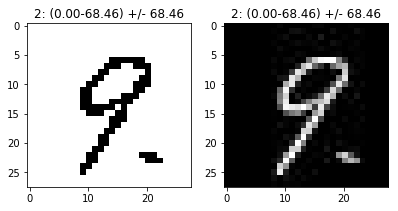

n_classes = 2, ret = 14


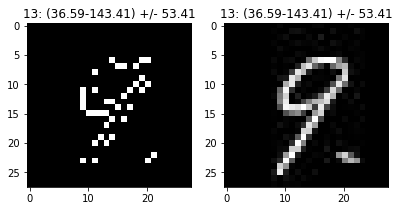

n_classes = 3, ret = 9


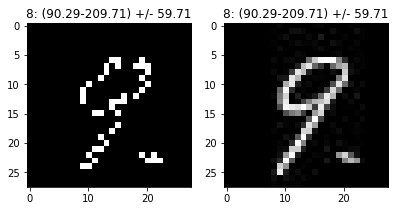

n_classes = 4, ret = 3


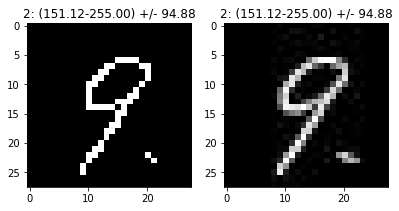

In [8]:
image1 = segment(sample_image1)

n_classes = 1, ret = 2


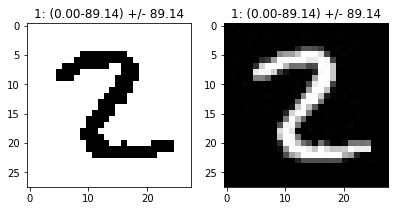

n_classes = 2, ret = 19


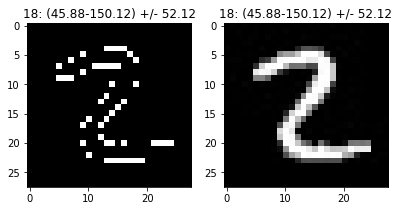

n_classes = 3, ret = 17


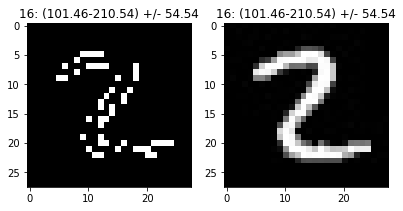

n_classes = 4, ret = 2


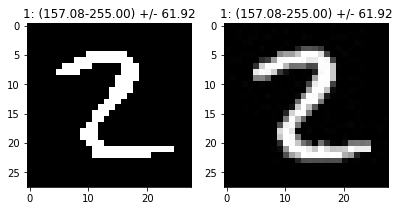

In [9]:
image2 = segment(sample_image2)

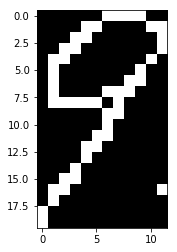

In [10]:
plt.imshow(image1, cmap='gray', vmin=0, vmax=1)

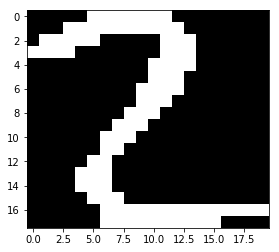

In [11]:
plt.imshow(image2, cmap='gray', vmin=0, vmax=1)

In [12]:
def image2coord(image, w):
    img = np.array(np.where(image==1))
    img[0, :] = w - img[0, :] - 1
    img = img[::-1, :]
    return img

def centralize(img):
    res = []
    for row in img:
        res.append((row - row.mean()) / (row.max() - row.min()))
    return np.array(res, dtype=np.float16)

In [13]:
img1 = image2coord(image1, h)
img2 = image2coord(image2, h)

print(img1)
print(img2)

[[  6   7   8   9   4   5  10  11   3   4  11   2   3  11   1   2  10   1
    9   1   8   9   1   6   7   8   1   2   3   4   5   7   6   7   6   5
    6   4   5   4   3   2   3   1   2   1   0   0]
 [  4   4   4   4   3   3   3   3   2   2   2   1   1   1   0   0   0  -1
   -1  -2  -2  -2  -3  -3  -3  -3  -4  -4  -4  -4  -4  -4  -5  -5  -6  -7
   -7  -8  -8  -9 -10 -11 -11 -12 -12 -13 -14 -15]]
[[  5   6   7   8   9  10  11   3   4   5   6   7   8   9  10  11  12   1
    2   3   4   5  11  12  13   0   1   2   3  11  12  13  10  11  12  13
   10  11  12   9  10  11  12   9  10  11   8   9  10   7   8   9   6   7
    8   6   7   5   6   4   5   6   4   5   6   5   6   7   6   7   8   9
   10  11  12  13  14  15  16  17  18  19   6   7   8   9  10  11  12  13
   14  15]
 [  4   4   4   4   4   4   4   3   3   3   3   3   3   3   3   3   3   2
    2   2   2   2   2   2   2   1   1   1   1   1   1   1   0   0   0   0
   -1  -1  -1  -2  -2  -2  -2  -3  -3  -3  -4  -4  -4  -5  -5  -5  -6  -

In [14]:
centroid1 = img1.mean(1)
centroid2 = img2.mean(1)

print(centroid1)
print(centroid2)

[ 4.875      -3.33333333]
[ 8.68478261 -4.36956522]


In [15]:
central1 = centralize(img1)
central2 = centralize(img2)

print(central1)
print(central2)

[[ 0.1023   0.1932   0.2842   0.375   -0.0795   0.01136  0.4658   0.5566
  -0.1704  -0.0795   0.5566  -0.2615  -0.1704   0.5566  -0.3523  -0.2615
   0.4658  -0.3523   0.375   -0.3523   0.2842   0.375   -0.3523   0.1023
   0.1932   0.2842  -0.3523  -0.2615  -0.1704  -0.0795   0.01136  0.1932
   0.1023   0.1932   0.1023   0.01136  0.1023  -0.0795   0.01136 -0.0795
  -0.1704  -0.2615  -0.1704  -0.3523  -0.2615  -0.3523  -0.443   -0.443  ]
 [ 0.386    0.386    0.386    0.386    0.3333   0.3333   0.3333   0.3333
   0.2808   0.2808   0.2808   0.228    0.228    0.228    0.1754   0.1754
   0.1754   0.1228   0.1228   0.0702   0.0702   0.0702   0.01755  0.01755
   0.01755  0.01755 -0.0351  -0.0351  -0.0351  -0.0351  -0.0351  -0.0351
  -0.0877  -0.0877  -0.1404  -0.193   -0.193   -0.2456  -0.2456  -0.2983
  -0.3508  -0.4036  -0.4036  -0.456   -0.456   -0.509   -0.5615  -0.6143 ]]
[[-0.194   -0.1414  -0.0887  -0.03604  0.01659  0.0692   0.1218  -0.2993
  -0.2466  -0.194   -0.1414  -0.0887  -0.0360

In [16]:
def optimize(X, Y):
    def transform(x):
        scale = x[0]
        weights = np.reshape(x[1:-output_size], (output_size, input_size))
        biases = np.reshape(x[-output_size:], (output_size,))
        return np.dot(scale * weights, X) + biases
    
    def constraint(x):
        return ((Y - transform(x))**2).mean()
    
    def unit_weight_constraint(x):
        weights = np.reshape(x[1:-output_size], (output_size, input_size))
        return int(not (weights[weights != 0] == 1).all())
    
    def objective(x):
        return (np.array(x)**2).mean()

    def callback(x):
        solutions.append(x)
    
    # all solutions
    solutions = []
    
    # sizes
    input_size, output_size = X.size, Y.size

    # the bounds
    bnds = tuple(
        [(-100, 100)] + #weight scale
        [(0, 1) for _ in range((input_size * output_size))] + #weights (bin vector)
        [(-1, 1) for _ in range(output_size)] #bias
    )
    
    # define constriants
    cons = ([
        {'type': 'eq', 'fun': constraint},
        {'type': 'eq', 'fun': unit_weight_constraint},

    ])
    
    # initial guesses
    # x0=np.random.randint(max_guess, size=total_number_of_options)
    x0 = np.full(len(bnds), 3.14)
    
    print(f'input = {X}\noutput = {Y}\n')
    # solutions
    solutions = [x0]

    # show initial objective
    print('Initial SSE Objective: {:.10f}\nx =>\n{}\ntransform =>\n{}\nerror = {:.4f}\n'.format(
            objective(x0), x0, transform(x0), constraint(x0)
        )
    )
    
    solution = minimize(objective, x0, method='SLSQP', bounds=bnds,
                        constraints=cons, callback=callback)
    x = solution.x

    # show final objective
    print('Final SSE Objective: {:.10f}\nx =>\n{}\ntransform =>\n{}\nerror = {:.4f}\n'.format(
            objective(x), x, transform(x), constraint(x)
        ), end='\n\n'
    )


In [17]:
X1, Y1 = central1
X2, Y2 = central2

In [18]:
s1 = X1.size + Y1.size
s2 = X2.size + Y2.size

# xX, xY, yX, yY = (X1, X2, Y1, Y2) if s1 > s2 else (X2, X1, Y2, Y1)
s1, s2

(96, 184)

In [ ]:
optimize(X2, X1)

input = [-0.194   -0.1414  -0.0887  -0.03604  0.01659  0.0692   0.1218  -0.2993
 -0.2466  -0.194   -0.1414  -0.0887  -0.03604  0.01659  0.0692   0.1218
  0.1744  -0.4045  -0.3518  -0.2993  -0.2466  -0.194    0.1218   0.1744
  0.2272  -0.457   -0.4045  -0.3518  -0.2993   0.1218   0.1744   0.2272
  0.0692   0.1218   0.1744   0.2272   0.0692   0.1218   0.1744   0.01659
  0.0692   0.1218   0.1744   0.01659  0.0692   0.1218  -0.03604  0.01659
  0.0692  -0.0887  -0.03604  0.01659 -0.1414  -0.0887  -0.03604 -0.1414
 -0.0887  -0.194   -0.1414  -0.2466  -0.194   -0.1414  -0.2466  -0.194
 -0.1414  -0.194   -0.1414  -0.0887  -0.1414  -0.0887  -0.03604  0.01659
  0.0692   0.1218   0.1744   0.2272   0.2798   0.3323   0.385    0.4377
  0.4902   0.543   -0.1414  -0.0887  -0.03604  0.01659  0.0692   0.1218
  0.1744   0.2272   0.2798   0.3323 ]
output = [ 0.1023   0.1932   0.2842   0.375   -0.0795   0.01136  0.4658   0.5566
 -0.1704  -0.0795   0.5566  -0.2615  -0.1704   0.5566  -0.3523  -0.2615
  0.465

In [ ]:
optimize(Y2, Y1)